In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [30]:
advertising = pd.read_csv("../input/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [31]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

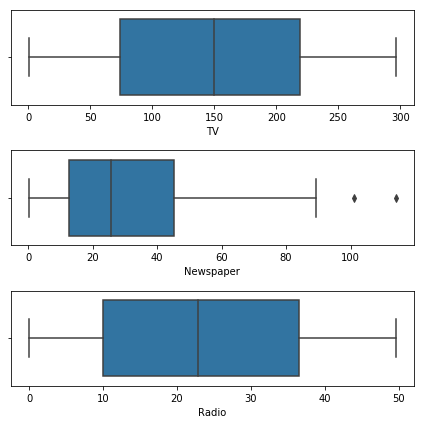

In [34]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

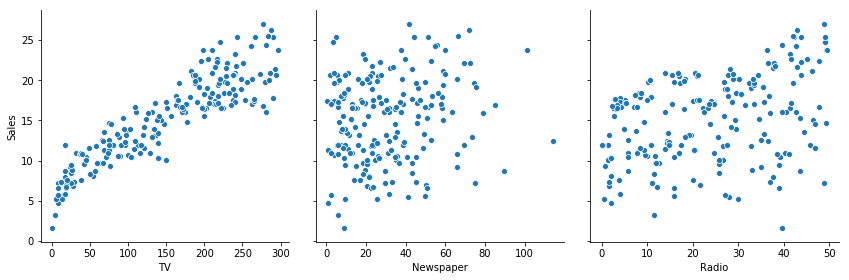

In [82]:
# how Sales are related with other variables.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

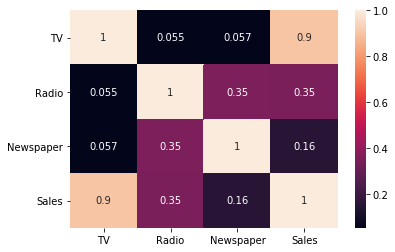

In [80]:
# correlation between different variables.
sns.heatmap(advertising.corr(), annot = True)
plt.show()

In [37]:
y = advertising['Sales']
X = advertising.drop('Sales',axis=1)

In [39]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
y_scaled = y_scaled.flatten()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.1,shuffle=True, random_state =42)

## Model Building

In [70]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
# test pred
gb_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(gb_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

gb_mse = mean_squared_error(y_test_original, y_pred)
gb_mae = mean_absolute_error(y_test_original, y_pred)
gb_r2 = r2_score(y_test_original, y_pred)

In [76]:
# train pred
gb_pred_t = model.predict(X_train)
y_pred_t = scaler_y.inverse_transform(gb_pred_t.reshape(-1, 1)).flatten()
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()

gb_mse_t = mean_squared_error(y_train_original, y_pred_t)
gb_mae_t = mean_absolute_error(y_train_original, y_pred_t)
gb_r2_t = r2_score(y_train_original, y_pred_t)

In [77]:
print(f"(train) Optimized Gradient Boosting Regressor Mean Squared Error: {gb_mse_t}")
print(f"(train) Optimized Gradient Boosting Regressor Mean Absolute Error: {gb_mae_t}")
print(f"(train) Optimized Gradient Boosting Regressor R² Score: {gb_r2_t}")

(train) Optimized Gradient Boosting Regressor Mean Squared Error: 0.22156573248031378
(train) Optimized Gradient Boosting Regressor Mean Absolute Error: 0.35661275165605155
(train) Optimized Gradient Boosting Regressor R² Score: 0.9918495556246966


In [78]:
print(f"(test) Optimized Gradient Boosting Regressor Mean Squared Error: {gb_mse}")
print(f"(test) Optimized Gradient Boosting Regressor Mean Absolute Error: {gb_mae}")
print(f"(test) Optimized Gradient Boosting Regressor R² Score: {gb_r2}")

(test) Optimized Gradient Boosting Regressor Mean Squared Error: 1.1712178240848503
(test) Optimized Gradient Boosting Regressor Mean Absolute Error: 0.8951082432615133
(test) Optimized Gradient Boosting Regressor R² Score: 0.9641642013381662


In [79]:
joblib.dump(model, 'Sales_gb_model.pkl')

['Sales_gb_model.pkl']